In [1]:
%env NEPTUNE_API_TOKEN='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2MTRjNjcyYi0yYzNhLTQwN2UtYTliOS05MzVhN2FmZTBiNGUifQ=='
%load_ext autoreload
%autoreload 2

env: NEPTUNE_API_TOKEN='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2MTRjNjcyYi0yYzNhLTQwN2UtYTliOS05MzVhN2FmZTBiNGUifQ=='


In [2]:
from gym_space.experiments.td3_visualisation import TD3ExperimentResults
import matplotlib.pyplot as plt
plt.rc('font', size=15)
experiments = dict()

In [6]:
EXPERIMENT_NUM =  733
DO_LOAD_OBS_BUF = True
FROM_TEST_RUN = False
if EXPERIMENT_NUM not in experiments:
    experiments[EXPERIMENT_NUM] = TD3ExperimentResults(
        EXPERIMENT_NUM,
        do_load_obs_buf=DO_LOAD_OBS_BUF,
        from_test_run=FROM_TEST_RUN
    )
exp = experiments[EXPERIMENT_NUM]

https://app.neptune.ai/kajetan.janiak/hover1d-td3/e/H1TD3-733
loading 41 models from neptune...
8 models loaded
16 models loaded
24 models loaded
32 models loaded
40 models loaded
done
obs space generated
Shutting down background jobs, please wait a moment...
Done!


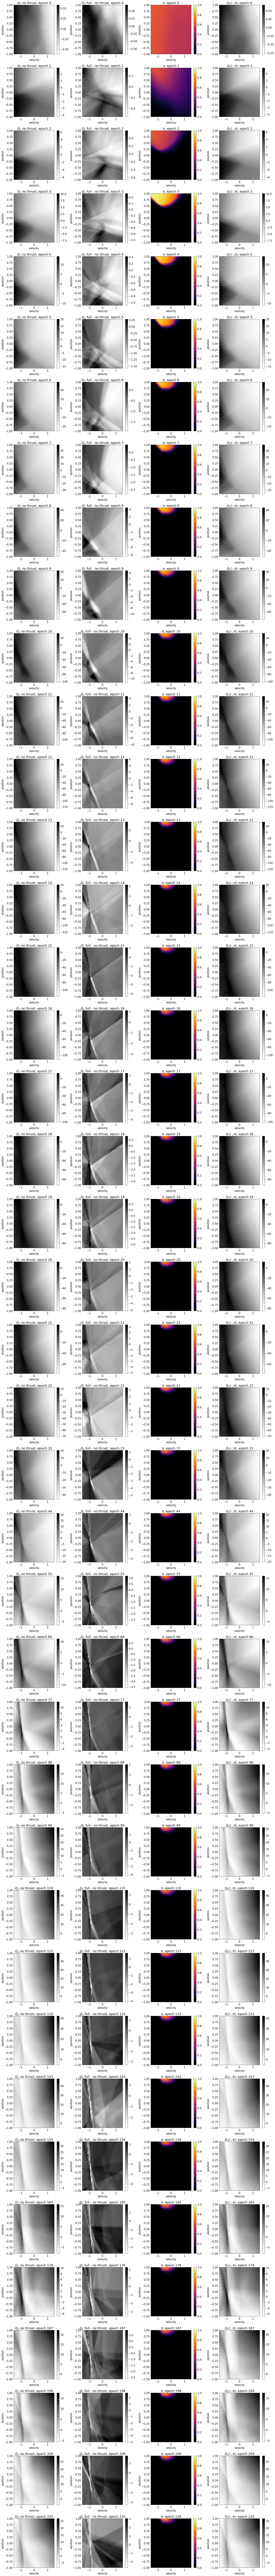

In [7]:
truncate_models = 50
num_models = min(len(exp.acs), truncate_models)
fig, axs = plt.subplots(num_models, 4, figsize=(22, 5 * num_models))
if len(axs.shape) == 1:
    axs = axs.reshape((1,axs.shape[0]))
for i, (epoch, ac) in tuple(enumerate(exp.acs.items()))[:truncate_models]:
    # Q1 no thrust
    q1_ax = axs[i, 0]
    q1_im = exp.plot_q1_on_const_action(q1_ax, 0.0, epoch)
    fig.colorbar(q1_im, ax=q1_ax)
    q1_ax.set_title(f"$Q_1$ no thrust, epoch {epoch}")

    # Q1 no - full
    q1_diff_ax = axs[i, 1]
    q1_diff_im = exp.plot_q1_full_minus_no_thrust(q1_diff_ax, epoch)
    fig.colorbar(q1_diff_im, ax=q1_diff_ax)
    q1_diff_ax.set_title(f"$Q_1$ full - no thrust, epoch {epoch}")

    # pi
    pi_ax = axs[i, 2]
    pi_im = exp.plot_policy(pi_ax, epoch)
    fig.colorbar(pi_im, ax=pi_ax)
    pi_ax.set_title(f"$\\pi$, epoch {epoch}")

    # Q1 on policy
    q1_on_pi_ax = axs[i, 3]
    q1_on_pi_im = exp.plot_q1_on_policy(q1_on_pi_ax, epoch)
    fig.colorbar(q1_on_pi_im, ax=q1_on_pi_ax)
    q1_on_pi_ax.set_title(f"$Q_1(\\cdot, \\pi)$, epoch {epoch}")

plt.tight_layout()

AttributeError: 'NoneType' object has no attribute 'copy'

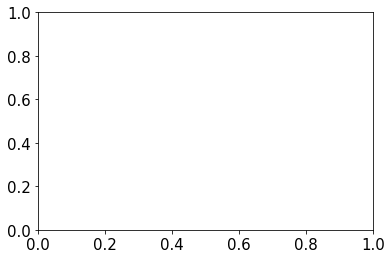

In [5]:
fig, ax = plt.subplots(1,1)
exp.plot_obs_density(ax)

In [ ]:
plt.scatter(exp.obs_buf[:100, 0], exp.obs_buf[:100, 1])